In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import re

In [3]:
df = pd.read_excel('Dados_ODS_Pordata_V3.xlsx')
print(df.shape)

(26715, 12)


In [4]:
df.head()

,Base de Dados,Tema,ODS-Designação,ODS,Código,Título,Tipo,Var. Ad-hoc,Ano,Território,Indicador,Símbolo
0,Europa,Objetivos de Desenvolvimento Sustentável,Ação climática,13,E15130001,Emissão de gases de efeito estufa,De base,Emissão de gases de efeito estufa,2010,Alemanha,11.8,Valor simples
1,Europa,Objetivos de Desenvolvimento Sustentável,Ação climática,13,E15130001,Emissão de gases de efeito estufa,De base,Emissão de gases de efeito estufa,2010,Áustria,10.4,Valor simples
2,Europa,Objetivos de Desenvolvimento Sustentável,Ação climática,13,E15130001,Emissão de gases de efeito estufa,De base,Emissão de gases de efeito estufa,2010,Bélgica,12.7,Valor simples
3,Europa,Objetivos de Desenvolvimento Sustentável,Ação climática,13,E15130001,Emissão de gases de efeito estufa,De base,Emissão de gases de efeito estufa,2010,Bulgária,8.3,Valor simples
4,Europa,Objetivos de Desenvolvimento Sustentável,Ação climática,13,E15130001,Emissão de gases de efeito estufa,De base,Emissão de gases de efeito estufa,2010,Chipre,12.5,Valor simples


In [5]:
df.nunique()

Base de Dados        1
Tema                 1
ODS-Designação      17
ODS                 17
Código             107
Título             113
Tipo                 1
Var. Ad-hoc         93
Ano                 11
Território          28
Indicador         7666
Símbolo              8
dtype: int64

In [6]:
title_groups_count = df.groupby('ODS').Título.nunique()
with open('title_groups_count.tex','w') as tf:
        tf.write(title_groups_count.to_latex())
title_groups_count

ODS
1     7
2     7
3     6
4     6
5     9
6     6
7     8
8     6
9     6
10    6
11    6
12    8
13    8
14    5
15    6
16    8
17    5
Name: Título, dtype: int64

In [7]:
with open('title_groups.tex','w') as tf:
    with pd.option_context("max_colwidth", 1000):
        tf.write(df.groupby('ODS').Título.unique().to_latex())


In [8]:
df.groupby(['Território','ODS'])["Indicador"].mean()

Território  ODS
Alemanha    1      2264.412857
            2       176.685085
            3        70.245385
            4        44.496364
            5        22.498649
                      ...     
Áustria     13       50.195378
            14        0.000000
            15       18.210588
            16       50.586849
            17     3949.000980
Name: Indicador, Length: 476, dtype: float64

In [9]:
df.groupby(['Território','ODS','Título'])["Indicador"].mean()

Território  ODS  Título                                                               
Alemanha    1    População a viver em agregados com intensidade laboral muito reduzida        9.600000
                 População em risco de pobreza ou exclusão social                         15779.900000
                 População em risco de pobreza ou exclusão social (%)                        19.490000
                 População que vive em alojamentos em más condições                          12.970000
                 Taxa de privação material severa                                             4.230000
                                                                                              ...     
Áustria     17   Administrações Públicas: dívida bruta em % do PIB                           80.627273
                 Ajuda pública ao desenvolvimento em % do rendimento nacional bruto           0.302000
                 Contribuição dos impostos ambientais nas receitas fiscais totais (%)    

In [10]:
df.groupby(['Símbolo']).Símbolo.count()

Símbolo
Dado inferior a metade do módulo da unidade utilizada        1
Não aplicável ou zero por default                           67
Valor estimado                                             843
Valor incerto ou não confiável                              13
Valor não disponível                                       951
Valor provisório                                           451
Valor rectificado                                           12
Valor simples                                            24377
Name: Símbolo, dtype: int64

In [11]:
df.groupby(['Território']).Indicador.mean()

Território
Alemanha                           4201.661251
Bulgária                            478.163829
Bélgica                            1753.179474
Chipre                              884.911131
Croácia                             603.563983
Dinamarca                          1656.978929
Eslováquia                          678.267879
Eslovénia                           786.913390
Espanha                            2739.377142
Estónia                             721.840317
Finlândia                          1314.108953
França                             3276.133552
Grécia                             1012.232758
Hungria                             760.288674
Irlanda                            1495.276777
Itália                             2667.031890
Letónia                             570.147704
Lituânia                            636.340513
Luxemburgo                         2224.815070
Malta                               643.002370
Países Baixos                      3386.162005
Po

In [12]:
df.groupby(['Território','ODS']).Indicador.mean()

Território  ODS
Alemanha    1      2264.412857
            2       176.685085
            3        70.245385
            4        44.496364
            5        22.498649
                      ...     
Áustria     13       50.195378
            14        0.000000
            15       18.210588
            16       50.586849
            17     3949.000980
Name: Indicador, Length: 476, dtype: float64

In [13]:
df_normalized = df.copy()
df_normalized = df.loc[df.Território != 'União Europeia 27 (desde 2020)']
df_normalized["Indicador"]=df_normalized.groupby('Título',sort=False).Indicador.transform(lambda x: x / x.max())
df_normalized.Indicador

C:\Users\UTILIZ~1\AppData\Local\Temp/ipykernel_12264/3412545949.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized["Indicador"]=df_normalized.groupby('Título',sort=False).Indicador.transform(lambda x: x / x.max())


0        0.445283
1        0.392453
2        0.479245
3        0.313208
4        0.471698
           ...   
26703    0.166667
26704    0.252632
26705    0.980583
26706    0.056410
26707    0.272085
Name: Indicador, Length: 25677, dtype: float64

,Alemanha,Bulgária,Bélgica,Chipre,Croácia,Dinamarca,Eslováquia,Eslovénia,Espanha,Estónia,...,Lituânia,Luxemburgo,Malta,Países Baixos,Polónia,Portugal,República Checa,Roménia,Suécia,Áustria
1,0.75,0.73,0.81,0.95,0.84,0.54,0.89,0.66,0.91,0.91,...,0.91,0.39,1.00,0.88,0.75,0.68,0.42,0.79,0.56,0.79
2,0.96,0.48,0.58,0.51,0.99,0.86,0.40,0.60,0.43,0.84,...,0.75,0.71,0.67,0.61,0.49,1.00,0.55,0.69,0.52,0.87
3,1.00,0.67,0.82,0.53,0.73,0.55,0.81,0.68,0.57,0.68,...,0.69,0.67,0.29,0.49,0.75,0.50,0.79,0.83,0.57,0.53
4,0.78,0.90,0.55,0.40,0.42,0.46,0.70,1.00,0.64,0.40,...,0.65,0.25,0.90,0.44,0.38,0.40,0.74,0.67,0.62,0.35
5,0.31,0.59,0.47,0.58,0.58,0.44,0.29,0.00,0.72,0.59,...,0.34,0.52,0.60,0.58,0.58,0.45,0.37,0.63,1.00,0.57
6,0.39,0.80,0.57,0.78,0.98,0.76,0.39,0.56,0.72,0.50,...,0.50,0.55,0.52,1.00,0.90,0.68,0.42,0.31,0.66,0.70
7,0.67,0.53,0.76,0.55,0.39,0.60,0.87,0.32,0.36,0.55,...,0.74,0.56,0.66,0.48,0.53,0.54,0.97,0.38,0.59,0.47
8,0.85,0.99,0.79,0.41,0.70,0.74,0.74,0.77,0.65,0.79,...,1.00,0.72,0.58,0.59,0.50,0.75,0.46,0.81,0.80,0.65
9,0.59,0.86,0.89,0.63,0.63,0.75,0.42,0.93,0.92,0.54,...,0.44,0.00,0.63,0.82,0.36,0.66,0.62,0.88,1.00,0.69
10,0.30,0.68,0.91,0.71,0.85,0.48,0.55,0.56,0.69,0.42,...,0.20,0.81,0.85,0.61,0.91,0.86,0.86,0.90,0.80,0.85


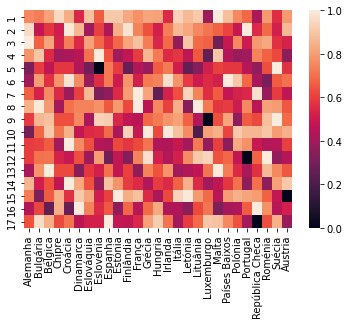

In [14]:
countries = ['Alemanha', 'Bulgária', 'Bélgica', 'Chipre','Croácia','Dinamarca', 'Eslováquia', 'Eslovénia', 'Espanha', 'Estónia',
            'Finlândia', 'França', 'Grécia', 'Hungria', 'Irlanda', 'Itália', 'Letónia', 'Lituânia', 'Luxemburgo', 'Malta', 
             'Países Baixos', 'Polónia', 'Portugal', 'República Checa', 'Roménia', 'Suécia', 'Áustria']
ODS_scores_by_Country_group = df_normalized.groupby(['Território','ODS'])
ODS_scores_by_Country = ODS_scores_by_Country_group.Indicador.mean()
ODS_scores_by_Country = ODS_scores_by_Country.values.reshape((17,27))
ODS_scores_by_Country_normalized = pd.DataFrame(data=ODS_scores_by_Country, index= [i for i in range(1,18)], columns= countries)
ODS_scores_by_Country_normalized = ODS_scores_by_Country_normalized.apply(lambda x: x / x.max(), axis = 1)
ODS_scores_by_Country_normalized = ODS_scores_by_Country_normalized.round(2)
sns.heatmap(ODS_scores_by_Country_normalized, xticklabels=ODS_scores_by_Country_normalized.columns.values, 
            yticklabels=ODS_scores_by_Country_normalized.index.values)
ODS_scores_by_Country_normalized

In [15]:
with open('ODS_by_Country_normalized.tex','w') as tf:
    selected_countries = ['Alemanha', 'Bulgária','Dinamarca', 'Eslováquia', 'Eslovénia', 'Espanha', 'Estónia',
                          'Itália', 'Portugal']
    tf.write(ODS_scores_by_Country_normalized[selected_countries].to_latex())

In [16]:
country_scores = ODS_scores_by_Country_normalized.sum()
countries = list(country_scores.keys())
values = country_scores.values.tolist()
country_scores

Alemanha           10.87
Bulgária           11.71
Bélgica            11.91
Chipre             10.38
Croácia            11.77
Dinamarca          11.11
Eslováquia         10.38
Eslovénia           9.80
Espanha            11.17
Estónia            10.42
Finlândia          11.07
França             11.05
Grécia             12.02
Hungria            10.69
Irlanda            11.07
Itália             11.07
Letónia            11.01
Lituânia           10.97
Luxemburgo          9.91
Malta              11.08
Países Baixos      10.80
Polónia            10.63
Portugal            9.96
República Checa    10.43
Roménia            11.63
Suécia             11.28
Áustria             9.97
dtype: float64

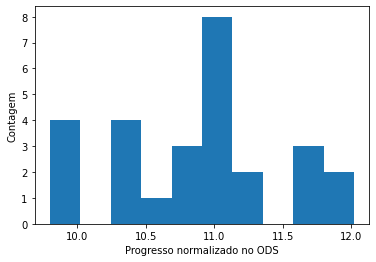

In [17]:
plt.figure()
plt.hist(country_scores)
plt.xlabel("Progresso normalizado no ODS")
plt.ylabel("Contagem")
plt.show()

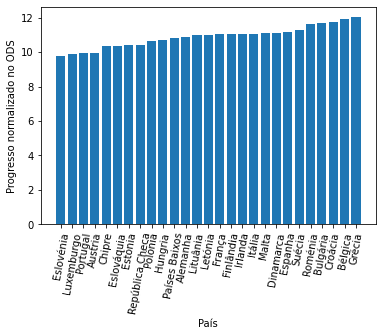

In [18]:
countries = [x for _,x in sorted(zip(values,countries))]
values = sorted(values)
plt.figure()
plt.bar(countries,values)
plt.xticks(rotation=80)
plt.xlabel('País')
plt.ylabel('Progresso normalizado no ODS')
plt.show()

In [19]:
df2 = pd.read_json('data.json')
print(df2.shape)

(351, 8)


In [20]:
df2.head()

,id,title,progresso,estado,country,color,img,Descricao
0,1,ODS1,3.5,7.760218,de,#EA1B2D,data/ods1.png,Erradicar a Pobreza
1,2,ODS1,2.4,22.146005,at,#EA1B2D,data/ods1.png,Erradicar a Pobreza
2,3,ODS1,2.9,9.105939,be,#EA1B2D,data/ods1.png,Erradicar a Pobreza
3,4,ODS1,3.7,-47.997289,bg,#EA1B2D,data/ods1.png,Erradicar a Pobreza
4,5,ODS1,2.9,-4.521340,cy,#EA1B2D,data/ods1.png,Erradicar a Pobreza


In [21]:
estado_scores = df2.groupby(['country']).estado.sum()/13
estado_scores

country
at    12.483731
be     9.487059
bg   -26.887759
cy   -11.526256
cz     0.279479
de     0.387398
dk    27.127946
ee    -1.030739
es     3.514502
fi    17.300527
fr    12.847697
gr   -10.249954
hr   -10.570652
hu    -8.030570
ie    17.212068
it    -4.781325
lt    -7.415377
lu     1.256432
lv    -7.715243
mt    -8.976234
nl    18.359814
pl   -13.430004
pt     1.051538
ro   -30.471034
se    24.384933
si     6.530140
sk   -11.138119
Name: estado, dtype: float64

In [22]:
progresso_scores = df2.groupby(['country']).progresso.sum()/13
progresso_scores

country
at    1.791793
be    2.073920
bg    1.525431
cy    1.559843
cz    2.139673
de    1.651389
dk    1.289524
ee    2.255080
es    1.943315
fi    1.855226
fr    1.365766
gr    2.256689
hr    2.134897
hu    1.609303
ie    2.347470
it    1.256738
lt    2.158794
lu    0.430766
lv    1.845722
mt    1.184873
nl    1.296460
pl    1.499561
pt    1.976027
ro    1.709113
se    1.655819
si    1.962452
sk    1.678251
Name: progresso, dtype: float64

In [23]:
df3 = pd.concat([estado_scores,progresso_scores],axis=1)
df3

,estado,progresso
country,,
at,12.483731,1.791793
be,9.487059,2.073920
bg,-26.887759,1.525431
cy,-11.526256,1.559843
cz,0.279479,2.139673
de,0.387398,1.651389
dk,27.127946,1.289524
ee,-1.030739,2.255080
es,3.514502,1.943315


In [24]:
superior_direito = df3[(df3['estado'] > 0) & (df3['progresso']>0)]
count_superior_direito = superior_direito.shape[0]
superior_direito

,estado,progresso
country,,
at,12.483731,1.791793
be,9.487059,2.073920
cz,0.279479,2.139673
de,0.387398,1.651389
dk,27.127946,1.289524
es,3.514502,1.943315
fi,17.300527,1.855226
fr,12.847697,1.365766
ie,17.212068,2.347470


In [25]:
inferior_esquerdo = df3[(df3['estado'] < 0) & (df3['progresso']<0)]
count_inferior_esquerdo = inferior_esquerdo.shape[0]
inferior_esquerdo

,estado,progresso
country,,


In [26]:
inferior_direito = df3[(df3['estado'] < 0) & (df3['progresso'] > 0)]
count_inferior_direito = inferior_direito.shape[0]
inferior_direito

,estado,progresso
country,,
bg,-26.887759,1.525431
cy,-11.526256,1.559843
ee,-1.030739,2.255080
gr,-10.249954,2.256689
hr,-10.570652,2.134897
hu,-8.030570,1.609303
it,-4.781325,1.256738
lt,-7.415377,2.158794
lv,-7.715243,1.845722


In [27]:
superior_esquerdo = df3[(df3['estado'] > 0) & (df3['progresso']<0)]
count_superior_esquerdo = superior_esquerdo.shape[0]
superior_esquerdo

,estado,progresso
country,,


Text(0, 0.5, 'Contagem')

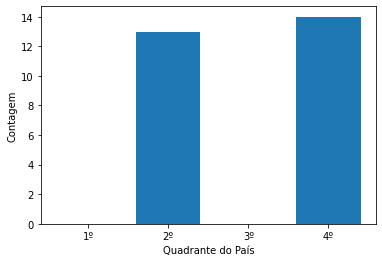

In [28]:
dist_names = ['1º','2º','3º','4º']
dist_values = [count_inferior_esquerdo,count_inferior_direito,count_superior_esquerdo, count_superior_direito]
plt.figure()
plt.bar(dist_names,dist_values)
plt.xlabel('Quadrante do País')
plt.ylabel('Contagem')


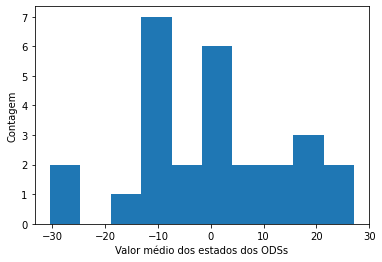

In [29]:
plt.figure()
plt.hist(df3.estado)
plt.xlabel("Valor médio dos estados dos ODSs")
plt.ylabel("Contagem")
plt.show()

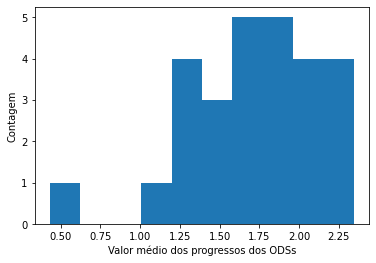

In [30]:
plt.figure()
plt.hist(df3.progresso)
plt.xlabel("Valor médio dos progressos dos ODSs")
plt.ylabel("Contagem")
plt.show()

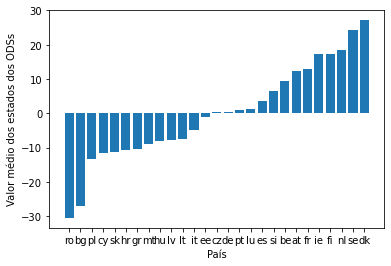

In [31]:
plt.figure()
sorted_countries = [x for _,x in sorted(zip(df3.estado,df3.index.values))]
sorted_values = sorted(df3.estado)
plt.bar(sorted_countries,sorted_values)
plt.xlabel("País")
plt.ylabel("Valor médio dos estados dos ODSs")
plt.show()

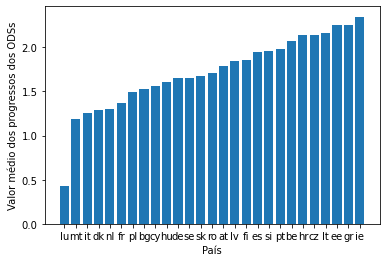

In [32]:
plt.figure()
sorted_countries = [x for _,x in sorted(zip(df3.progresso,df3.index.values))]
sorted_values = sorted(df3.progresso)
plt.bar(sorted_countries,sorted_values)
plt.xlabel("País")
plt.ylabel("Valor médio dos progressos dos ODSs")
plt.show()

In [33]:
df5 = df2.pivot_table(columns='title', index='country', values='estado')
df5=df5.reindex(sorted(df5.columns, key = lambda x : int(re.findall(r'\d+', x)[0])), axis=1)
df5

title,ODS1,ODS2,ODS3,ODS4,ODS5,ODS6,ODS7,ODS8,ODS9,ODS10,ODS11,ODS12,ODS13
country,,,,,,,,,,,,,
at,22.146005,12.824247,10.247055,10.332814,7.312529,9.085530,5.156626,8.821412,46.362647,18.453076,22.832369,10.641862,-21.927674
be,9.105939,-2.879473,16.000809,12.880534,44.050289,17.320890,-18.914568,-6.692963,35.968492,31.655413,-8.688040,-17.148190,10.672635
bg,-47.997289,7.677982,-25.257339,-50.530403,-1.229066,-22.277980,-18.883896,-21.381771,-45.512077,-35.827471,-40.687193,-45.655913,-1.978443
cy,-4.521340,-30.510452,16.407805,-1.816816,-31.828480,-35.870380,-24.981584,-15.969875,-35.750053,47.175545,-17.450371,-14.268731,-0.456590
cz,39.382574,31.540054,-7.200192,-5.505873,-44.229072,0.669939,7.259695,-11.696140,1.096084,3.628675,21.804186,-15.865049,-17.251649
de,7.760218,-1.660438,13.679410,-26.577561,2.639588,11.320994,-29.148336,16.688143,27.545391,25.200535,4.106709,-18.106667,-28.411814
dk,19.247447,30.917745,6.504781,25.830688,32.223613,27.869248,33.757456,36.759024,55.744385,18.914054,18.260080,33.863619,12.771156
ee,-11.445997,15.198269,-14.224461,23.070126,-26.719988,14.583562,18.355624,15.598592,-5.457801,-13.658821,23.202923,-17.000544,-34.901089
es,-7.133389,16.805020,22.906702,-5.058277,15.904836,20.968866,-2.334335,-21.721611,-32.528397,-15.761366,3.280613,16.202443,34.157425


<AxesSubplot:xlabel='title', ylabel='country'>

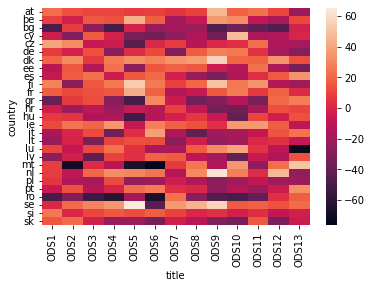

In [34]:
sns.heatmap(df5, xticklabels=df5.columns.values, 
            yticklabels=df5.index.values)

In [43]:
df5.iloc[0].values.tolist()
len(angles)

14

In [40]:

N = len(categories)

In [57]:
def make_spider(df, row, color, title):
    
    # number of variable
    categories=["ODS1","ODS2","ODS3","ODS4","ODS5","ODS6","ODS7","ODS8","ODS9","ODS10","ODS11","ODS12","ODS13"]
    N = len(categories)

    angles = [n / float(N) * 2 * pi for n in range(N)]
    angles += angles[:1]
     
    plt.rc('figure', figsize=(12, 12))
 
    ax = plt.subplot(1,1,1, polar=True)
 
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
 
   
    plt.xticks(angles[:-1], categories, color='black', size=12)
    ax.tick_params(axis='x', rotation=5.5)
    
    ax.set_rlabel_position(0)
    plt.yticks([-30,-15,0,15], ["-30","-15","0","15"], color="black", size=10)
    plt.ylim(-30,30)
 
    
    values=df.reset_index().loc[row].values.tolist()[1:]
    values += values[:1]
    ax.plot(angles, values, color = color, linewidth=1, linestyle='solid')
    ax.fill(angles, values, color = color, alpha = 0.5)
 
  
    title = "Radar showing performance in each subject for "+ title
    plt.title(title, fontsize=20, x = 0.5, y = 1.1)
    plt.savefig('radarplot.png')

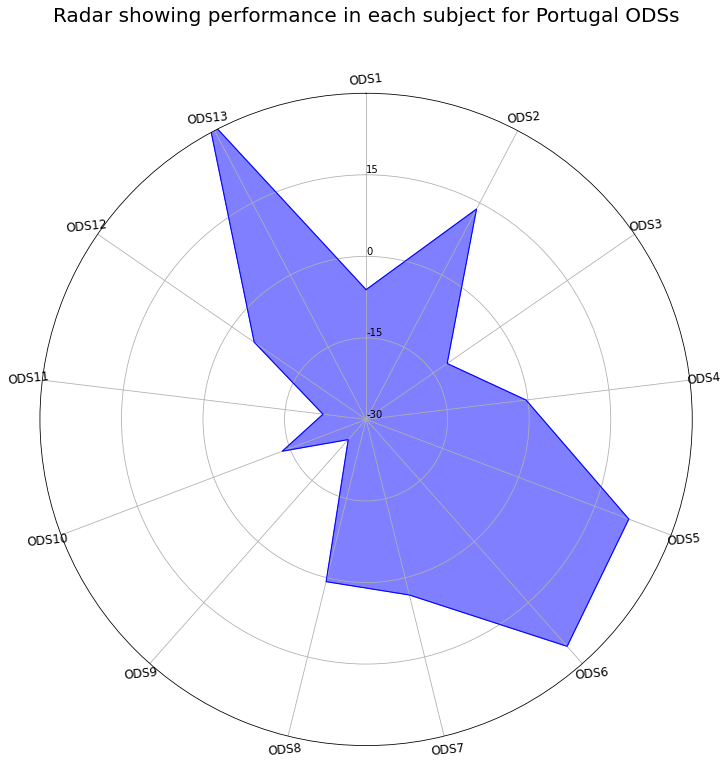

In [58]:
make_spider(df5,22, 'blue', 'Portugal ODSs')